In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m 
from statsmodels.formula.api import ols

from read_dataframe import generate_df

In [2]:
df = generate_df()
df

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
...,...,...,...,...,...,...,...
89478,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,1.0,wind_electricity
89479,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,NaN,wind_electricity
89480,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,NaN,wind_electricity
89481,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,NaN,wind_electricity


In [15]:
df_avg = df[['year', 'quantity']].groupby('year').mean()
df_avg = df_avg.reset_index()
df_avg


,year,quantity
0,1990,766127.568030
1,1991,67986.271518
2,1992,51300.466206
3,1993,421701.771735
4,1994,53442.340185
5,1995,43648.705001
6,1996,29316.468321
7,1997,531235.128805
8,1998,196225.050705
9,1999,173811.201418


In [16]:
df_reg = ols('quantity ~ year', data=df_avg).fit()

df_reg.params

Intercept    4.084084e+06
year        -1.946844e+03
dtype: float64

In [17]:
explan_col = pd.DataFrame({'year' : np.arange(1990,2020)})
reg_table = explan_col.assign(
    estimated_total=df_reg.predict(explan_col)
)

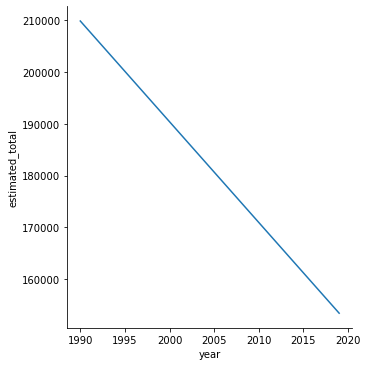

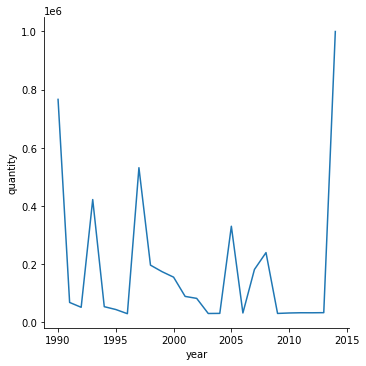

In [19]:
sns.relplot(x='year', y='estimated_total',
           data=reg_table,
           kind='line')
sns.relplot(x='year', y='quantity',
            data=df_avg,
            kind='line')

plt.show()

In [ ]:
type

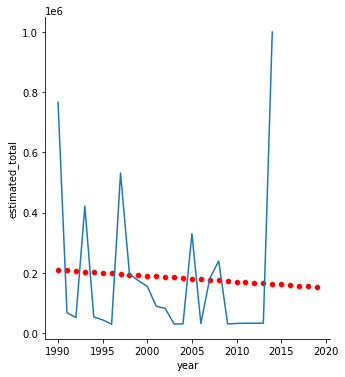

In [34]:
# fig = df_reg.fit()

# fig.regplot(data=df_reg, x='year', y='estimated_total')

# plt.show()

# fig = plt.figure()

# sns.axline(xy1=(0,0), slope=1, thickness=1, color='red')

sns.relplot(x='year', y='estimated_total',
            data=reg_table,
            kind='scatter',    
            color='red')

sns.lineplot(x='year', y='quantity',
            data=df_avg)

# # plt.axis(‘equal’) sets the scaling on each axis to be equal

plt.show()
